In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
df = pd.read_csv("/content/IRIS[1].csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


In [8]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
df.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [11]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


In [12]:
data=df.iloc[:,1:]

In [13]:
data.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


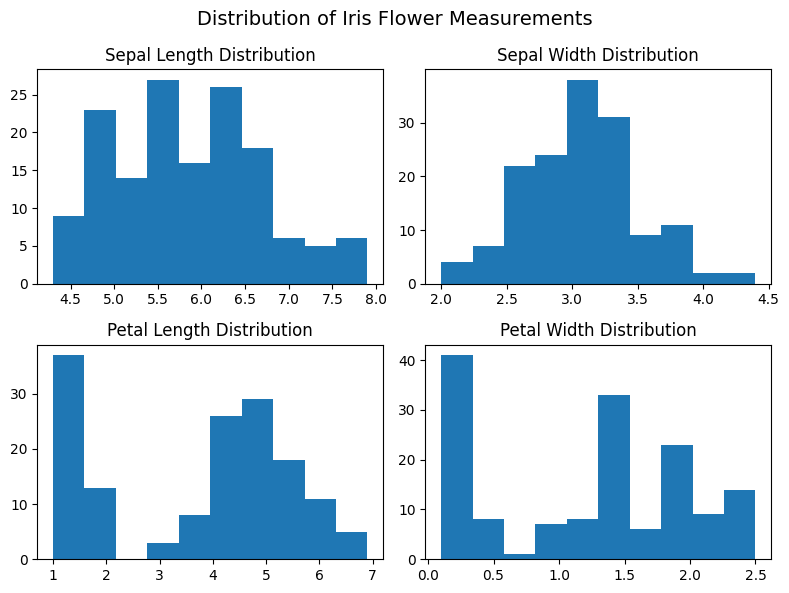

In [15]:
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)
plt.subplot(2, 2, 1)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')
plt.subplot(2, 2, 2)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')
plt.subplot(2, 2, 3)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')
plt.subplot(2, 2, 4)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')
plt.tight_layout()
plt.show()

In [16]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

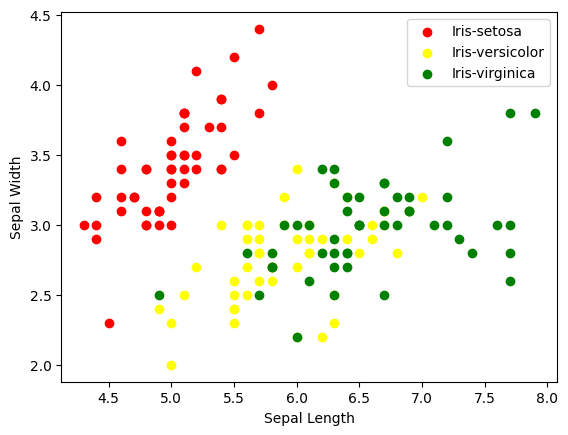

In [19]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

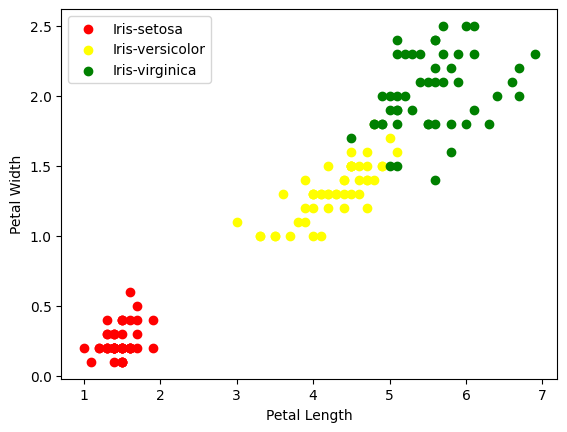

In [21]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

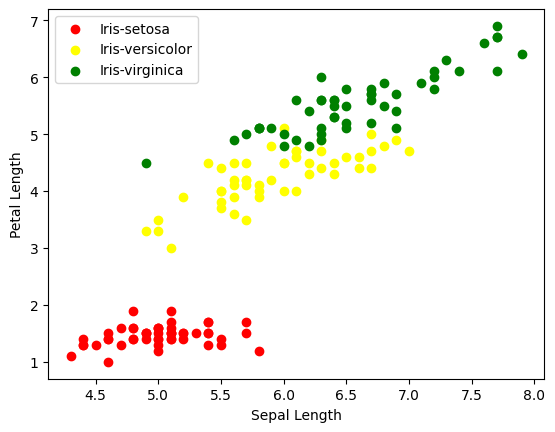

In [23]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

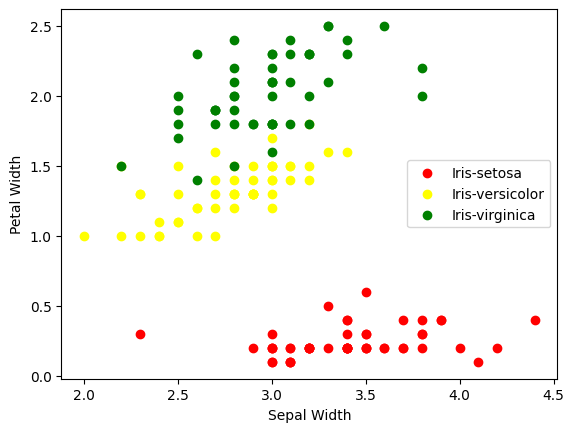

In [25]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

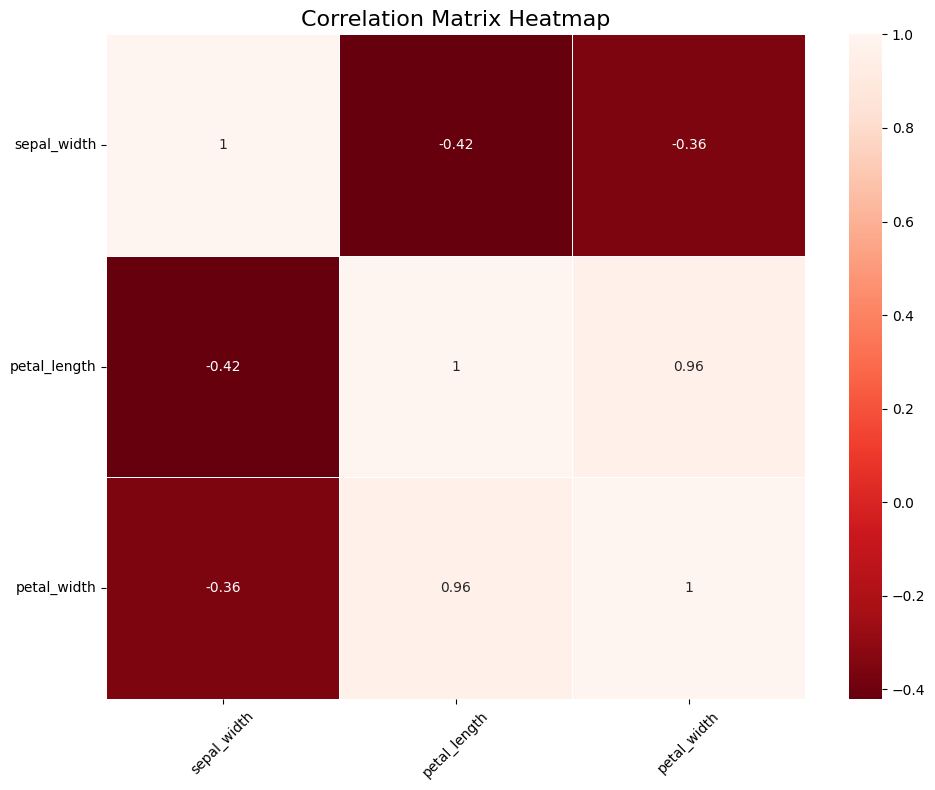

In [26]:
numeric_data = data.select_dtypes(include=[float, int])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
unique_species = data['species'].unique()
print("Encoded Species Values:")
print(unique_species)

Encoded Species Values:
[0 1 2]


In [30]:
x=data.drop(columns=['species'], axis=1)
y=data['species']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [32]:
y_train.value_counts()

,count
species,
2,37
0,35
1,33


In [33]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")
    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")
    plt.tight_layout()
    plt.show()
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']
    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test]
    return model_score

In [34]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

In [35]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Confusion Matrix:


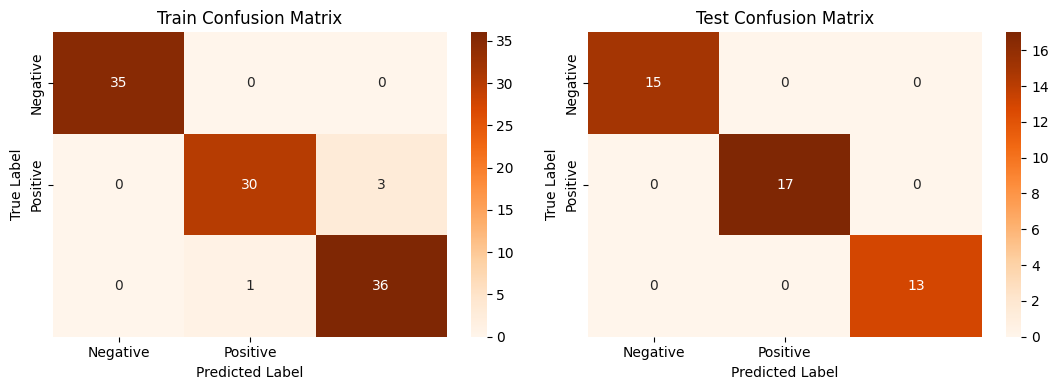


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.967742 | 0.909091 |   0.9375   |  33        |
| 2            |    0.923077 | 0.972973 |   0.947368 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.963606 | 0.960688 |   0.961623 | 105        |
| weighted avg |    0.962756 | 0.961905 |   0.961811 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        17 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [36]:
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [37]:
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'saga'}


In [39]:
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


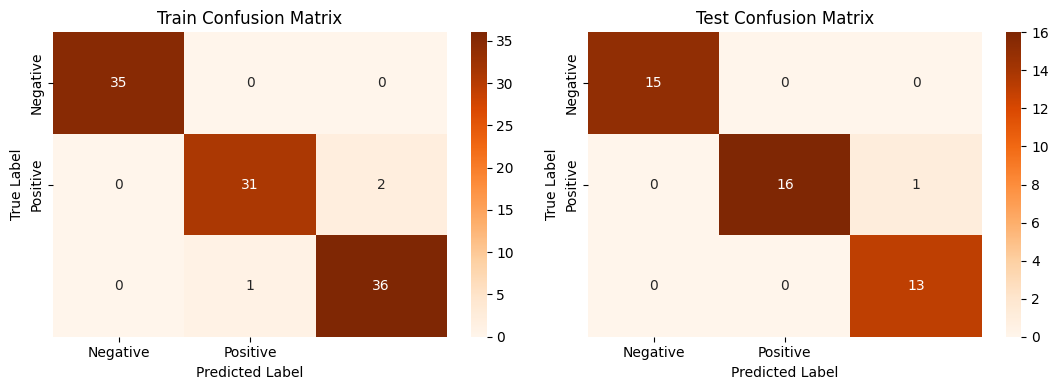


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.96875  | 0.939394 |   0.953846 |  33        |
| 2            |    0.947368 | 0.972973 |   0.96     |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.972039 | 0.970789 |   0.971282 | 105        |
| weighted avg |    0.971632 | 0.971429 |   0.971399 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.941176 |   0.969697 | 17        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [40]:
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [41]:
score['Logistic regression tuned'] = lr_score2

In [42]:
score

,Logistic regression tuned
Precision Train,0.971632
Precision Test,0.979365
Recall Train,0.971429
Recall Test,0.977778
Accuracy Train,0.971429
Accuracy Test,0.977778
F1 macro Train,0.971399
F1 macro Test,0.977853


In [43]:
dt_model = DecisionTreeClassifier(random_state=20)


Confusion Matrix:


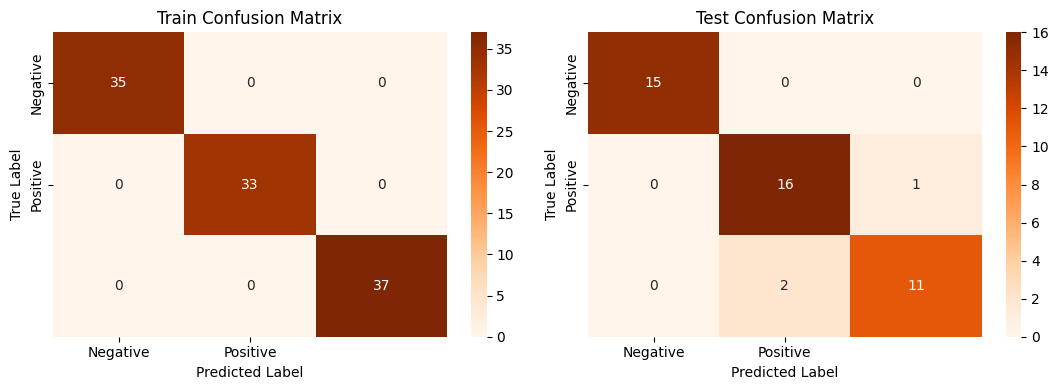


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.888889 | 0.941176 |   0.914286 | 17        |
| 2            |    0.916667 | 0.846154 |   0.88     | 13        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [44]:
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [45]:
score['Decision Tree'] = dt_score
score

,Logistic regression tuned,Decision Tree
Precision Train,0.971632,1.000000
Precision Test,0.979365,0.933951
Recall Train,0.971429,1.000000
Recall Test,0.977778,0.933333
Accuracy Train,0.971429,1.000000
Accuracy Test,0.977778,0.933333
F1 macro Train,0.971399,1.000000
F1 macro Test,0.977853,0.932952


In [46]:
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}
model = DecisionTreeClassifier()
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
grid_search = GridSearchCV(model, grid, cv=rskf)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': np.int64(10), 'min_samples_split': np.int64(2)}


In [47]:
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


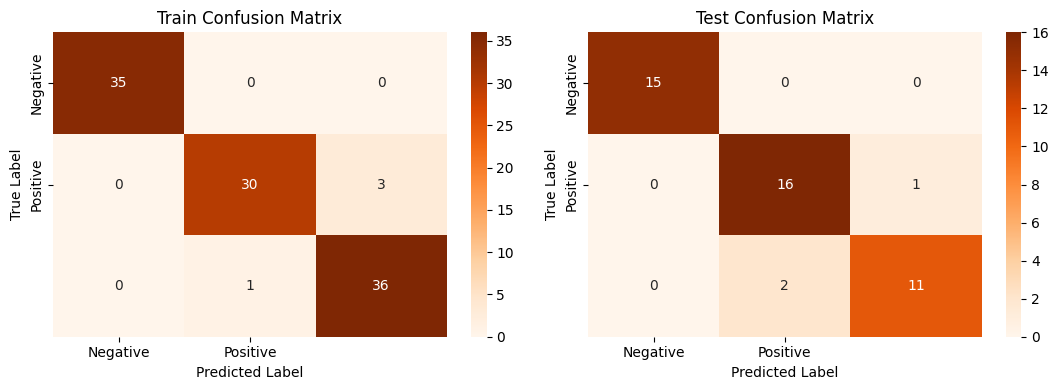


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.967742 | 0.909091 |   0.9375   |  33        |
| 2            |    0.923077 | 0.972973 |   0.947368 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.963606 | 0.960688 |   0.961623 | 105        |
| weighted avg |    0.962756 | 0.961905 |   0.961811 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.888889 | 0.941176 |   0.914286 | 17        |
| 2            |    0.916667 | 0.846154 |   0.88     | 13        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [48]:
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [49]:
score['Decision Tree tuned'] = dt2_score

In [50]:
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.971632,1.000000,0.962756
Precision Test,0.979365,0.933951,0.933951
Recall Train,0.971429,1.000000,0.961905
Recall Test,0.977778,0.933333,0.933333
Accuracy Train,0.971429,1.000000,0.961905
Accuracy Test,0.977778,0.933333,0.933333
F1 macro Train,0.971399,1.000000,0.961811
F1 macro Test,0.977853,0.932952,0.932952


In [51]:
rf_model = RandomForestClassifier(random_state=0)


Confusion Matrix:


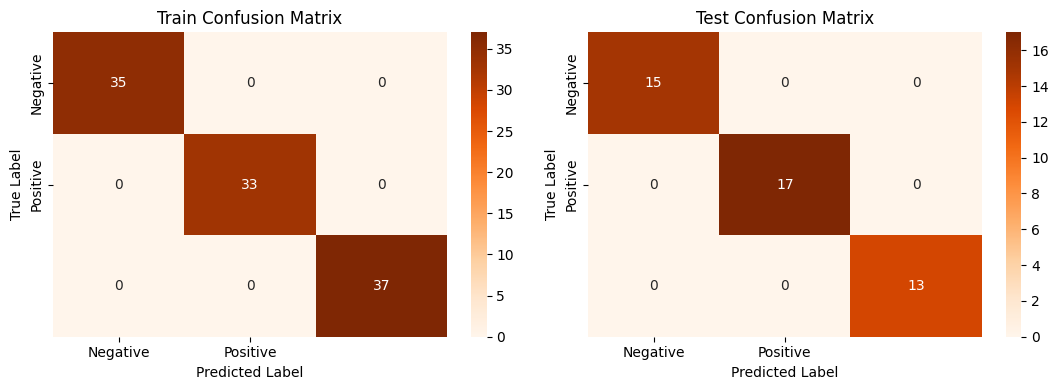


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        17 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [52]:
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [53]:
score['Random Forest'] = rf_score
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.971632,1.000000,0.962756,1.0
Precision Test,0.979365,0.933951,0.933951,1.0
Recall Train,0.971429,1.000000,0.961905,1.0
Recall Test,0.977778,0.933333,0.933333,1.0
Accuracy Train,0.971429,1.000000,0.961905,1.0
Accuracy Test,0.977778,0.933333,0.933333,1.0
F1 macro Train,0.971399,1.000000,0.961811,1.0
F1 macro Test,0.977853,0.932952,0.932952,1.0


In [54]:
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}
rf = RandomForestClassifier(random_state=0)
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 11}


In [55]:
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


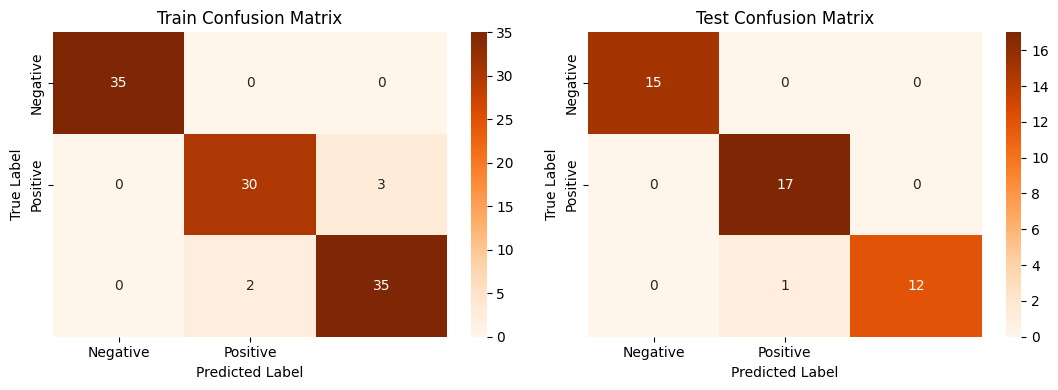


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.9375   | 0.909091 |   0.923077 |  33        |
| 2            |    0.921053 | 0.945946 |   0.933333 |  37        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.952851 | 0.951679 |   0.952137 | 105        |
| weighted avg |    0.952538 | 0.952381 |   0.952332 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.944444 | 1        |   0.971429 | 17        |
| 2            |    1        | 0.923077 |   0.96     | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [56]:
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [57]:
score['Random Forest tuned'] = rf2_score

In [58]:
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.971632,1.000000,0.962756,1.0,0.952538
Precision Test,0.979365,0.933951,0.933951,1.0,0.979012
Recall Train,0.971429,1.000000,0.961905,1.0,0.952381
Recall Test,0.977778,0.933333,0.933333,1.0,0.977778
Accuracy Train,0.971429,1.000000,0.961905,1.0,0.952381
Accuracy Test,0.977778,0.933333,0.933333,1.0,0.977778
F1 macro Train,0.971399,1.000000,0.961811,1.0,0.952332
F1 macro Test,0.977853,0.932952,0.932952,1.0,0.977651


In [59]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)


Confusion Matrix:


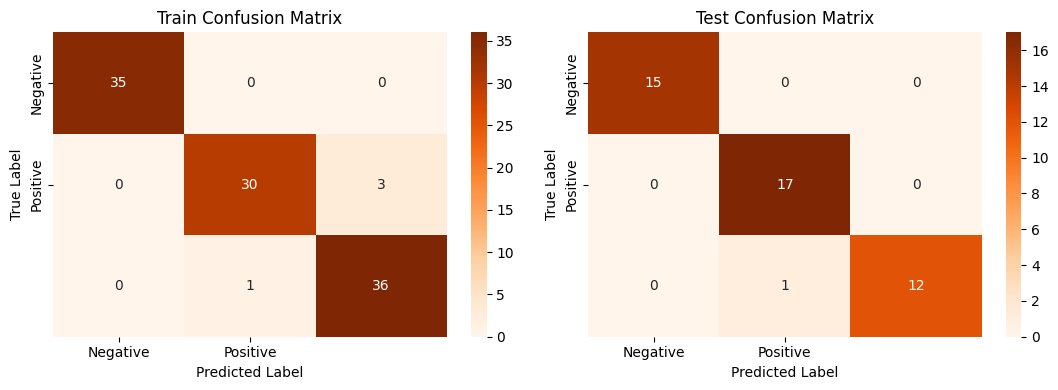


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.967742 | 0.909091 |   0.9375   |  33        |
| 2            |    0.923077 | 0.972973 |   0.947368 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.963606 | 0.960688 |   0.961623 | 105        |
| weighted avg |    0.962756 | 0.961905 |   0.961811 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.944444 | 1        |   0.971429 | 17        |
| 2            |    1        | 0.923077 |   0.96     | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [60]:
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [61]:
score['SVM'] = svm_score
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.971632,1.000000,0.962756,1.0,0.952538,0.962756
Precision Test,0.979365,0.933951,0.933951,1.0,0.979012,0.979012
Recall Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905
Recall Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778
Accuracy Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905
Accuracy Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778
F1 macro Train,0.971399,1.000000,0.961811,1.0,0.952332,0.961811
F1 macro Test,0.977853,0.932952,0.932952,1.0,0.977651,0.977651


In [62]:
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}
svm = SVC(random_state=0, probability=True)
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'rbf', 'degree': np.int64(4), 'C': np.float64(2.7)}


In [63]:
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


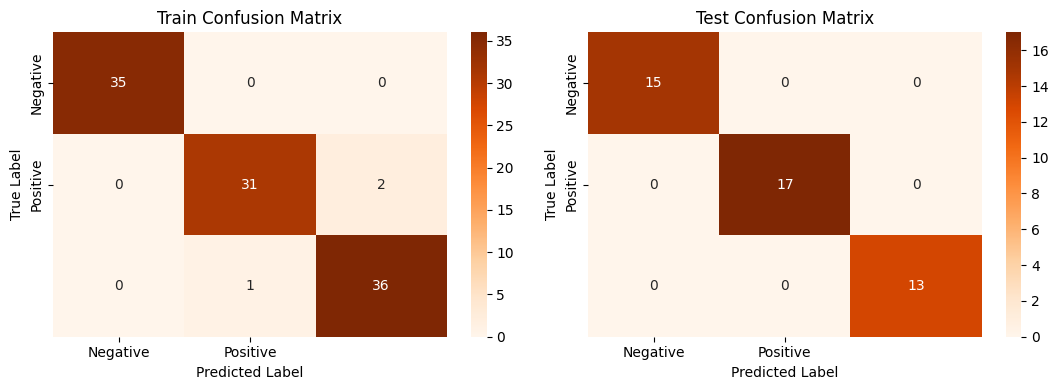


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.96875  | 0.939394 |   0.953846 |  33        |
| 2            |    0.947368 | 0.972973 |   0.96     |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.972039 | 0.970789 |   0.971282 | 105        |
| weighted avg |    0.971632 | 0.971429 |   0.971399 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        17 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [64]:
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [65]:
score['SVM tuned'] = svm2_score

In [66]:
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.971632,1.000000,0.962756,1.0,0.952538,0.962756,0.971632
Precision Test,0.979365,0.933951,0.933951,1.0,0.979012,0.979012,1.000000
Recall Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429
Recall Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000
Accuracy Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429
Accuracy Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000
F1 macro Train,0.971399,1.000000,0.961811,1.0,0.952332,0.961811,0.971399
F1 macro Test,0.977853,0.932952,0.932952,1.0,0.977651,0.977651,1.000000


In [67]:
xgb_model = xgb.XGBClassifier()


Confusion Matrix:


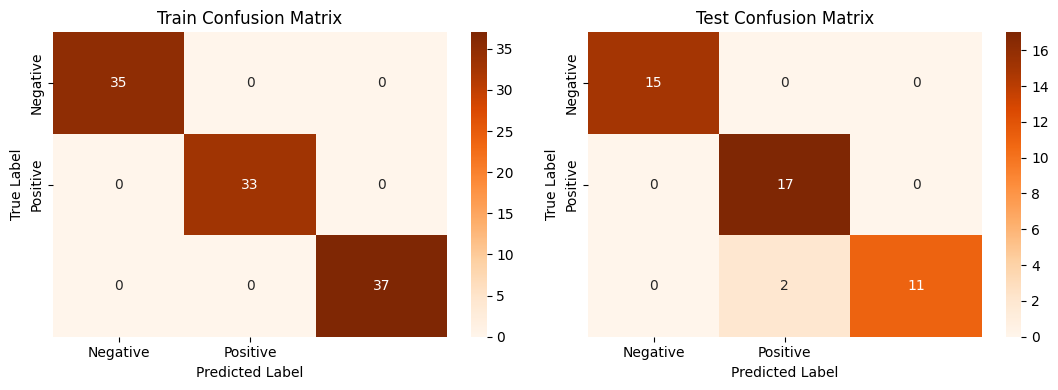


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.894737 | 1        |   0.944444 | 17        |
| 2            |    1        | 0.846154 |   0.916667 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [68]:
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [69]:
score['XGB'] = xgb_score
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.971632,1.000000,0.962756,1.0,0.952538,0.962756,0.971632,1.000000
Precision Test,0.979365,0.933951,0.933951,1.0,0.979012,0.979012,1.000000,0.960234
Recall Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000
Recall Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556
Accuracy Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000
Accuracy Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556
F1 macro Train,0.971399,1.000000,0.961811,1.0,0.952332,0.961811,0.971399,1.000000
F1 macro Test,0.977853,0.932952,0.932952,1.0,0.977651,0.977651,1.000000,0.954938


In [70]:
param_grid = {
    'learning_rate': np.arange(0.01, 0.3, 0.01),
    'max_depth': np.arange(3, 15, 1),
    'n_estimators': np.arange(100, 200, 10)
              }
xgb2 = xgb.XGBClassifier(random_state=0)
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': np.int64(130), 'max_depth': np.int64(14), 'learning_rate': np.float64(0.03)}


In [71]:
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


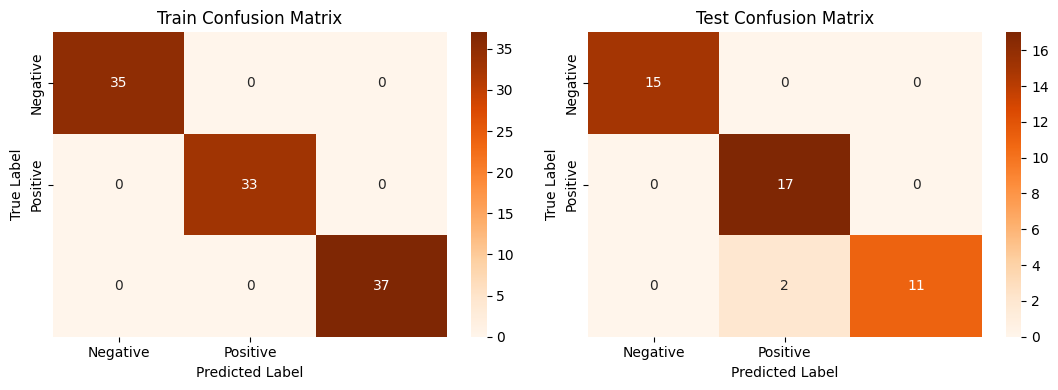


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.894737 | 1        |   0.944444 | 17        |
| 2            |    1        | 0.846154 |   0.916667 | 13        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [72]:
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [73]:
score['XGB tuned'] = xgb2_score

In [74]:
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.971632,1.000000,0.962756,1.0,0.952538,0.962756,0.971632,1.000000,1.000000
Precision Test,0.979365,0.933951,0.933951,1.0,0.979012,0.979012,1.000000,0.960234,0.960234
Recall Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000
Recall Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556
Accuracy Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000
Accuracy Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556
F1 macro Train,0.971399,1.000000,0.961811,1.0,0.952332,0.961811,0.971399,1.000000,1.000000
F1 macro Test,0.977853,0.932952,0.932952,1.0,0.977651,0.977651,1.000000,0.954938,0.954938


In [75]:
nb_model = GaussianNB()


Confusion Matrix:


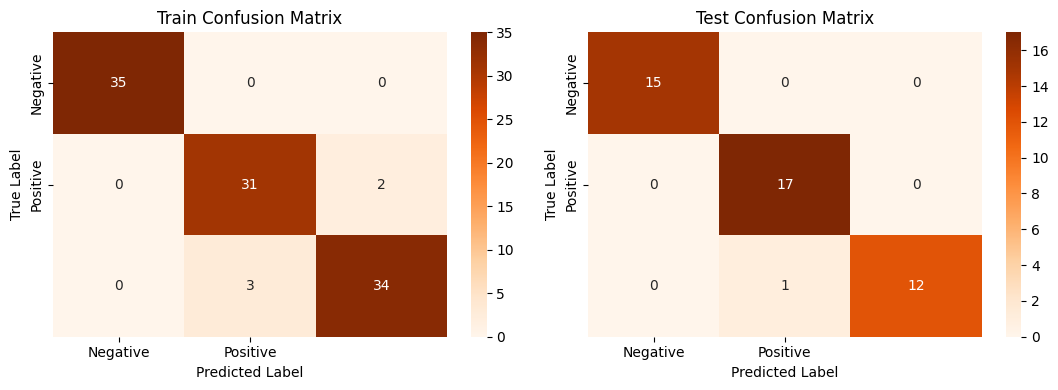


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.911765 | 0.939394 |   0.925373 |  33        |
| 2            |    0.944444 | 0.918919 |   0.931507 |  37        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.95207  | 0.952771 |   0.952293 | 105        |
| weighted avg |    0.952692 | 0.952381 |   0.95241  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.944444 | 1        |   0.971429 | 17        |
| 2            |    1        | 0.923077 |   0.96     | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [76]:
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [77]:
score['Naive Bayes'] = nb_score
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.971632,1.000000,0.962756,1.0,0.952538,0.962756,0.971632,1.000000,1.000000,0.952692
Precision Test,0.979365,0.933951,0.933951,1.0,0.979012,0.979012,1.000000,0.960234,0.960234,0.979012
Recall Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000,0.952381
Recall Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556,0.977778
Accuracy Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000,0.952381
Accuracy Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556,0.977778
F1 macro Train,0.971399,1.000000,0.961811,1.0,0.952332,0.961811,0.971399,1.000000,1.000000,0.952410
F1 macro Test,0.977853,0.932952,0.932952,1.0,0.977651,0.977651,1.000000,0.954938,0.954938,0.977651


In [78]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
naive = GaussianNB()
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)
GridSearch.fit(x_train, y_train)
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': np.float64(0.23101297000831597)}


In [79]:
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


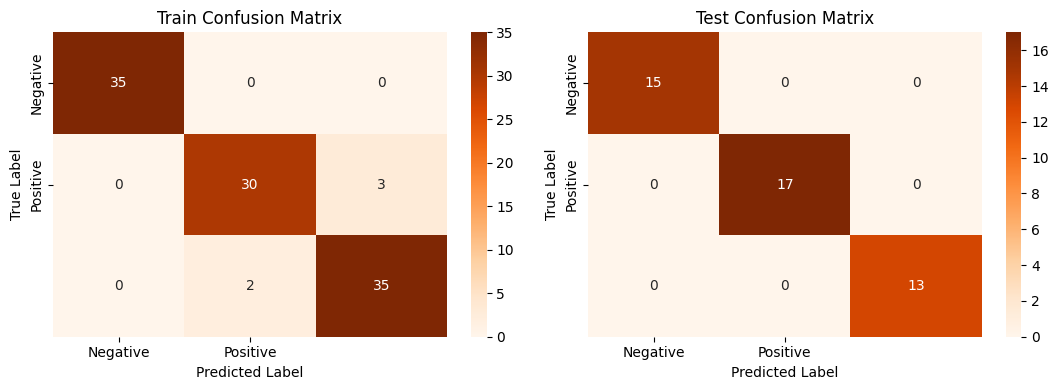


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.9375   | 0.909091 |   0.923077 |  33        |
| 2            |    0.921053 | 0.945946 |   0.933333 |  37        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.952851 | 0.951679 |   0.952137 | 105        |
| weighted avg |    0.952538 | 0.952381 |   0.952332 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        17 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [80]:
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [81]:
score['Naive Bayes tuned']= nb2_score

In [82]:
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.971632,1.000000,0.962756,1.0,0.952538,0.962756,0.971632,1.000000,1.000000,0.952692,0.952538
Precision Test,0.979365,0.933951,0.933951,1.0,0.979012,0.979012,1.000000,0.960234,0.960234,0.979012,1.000000
Recall Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000,0.952381,0.952381
Recall Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556,0.977778,1.000000
Accuracy Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000,0.952381,0.952381
Accuracy Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556,0.977778,1.000000
F1 macro Train,0.971399,1.000000,0.961811,1.0,0.952332,0.961811,0.971399,1.000000,1.000000,0.952410,0.952332
F1 macro Test,0.977853,0.932952,0.932952,1.0,0.977651,0.977651,1.000000,0.954938,0.954938,0.977651,1.000000


In [83]:
nn_model = MLPClassifier(random_state=0)


Confusion Matrix:


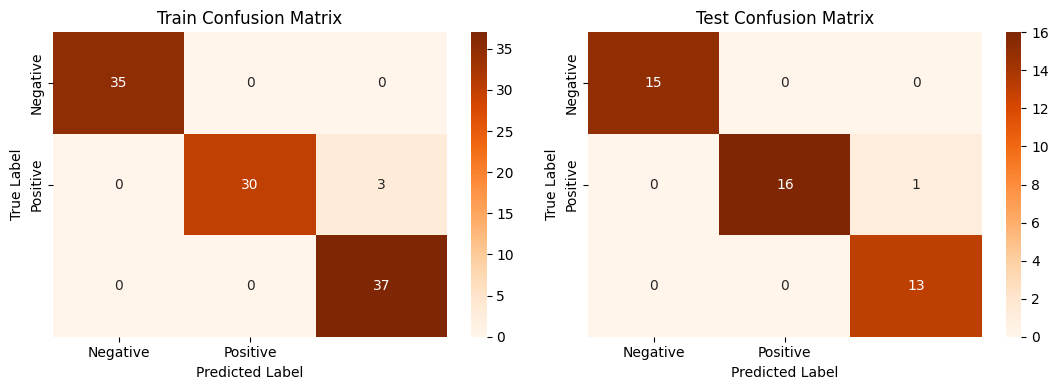


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.909091 |   0.952381 |  33        |
| 2            |    0.925    | 1        |   0.961039 |  37        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.975    | 0.969697 |   0.97114  | 105        |
| weighted avg |    0.973571 | 0.971429 |   0.971305 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.941176 |   0.969697 | 17        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [84]:
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [85]:
score['Neural Network'] = neural_score
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.971632,1.000000,0.962756,1.0,0.952538,0.962756,0.971632,1.000000,1.000000,0.952692,0.952538,0.973571
Precision Test,0.979365,0.933951,0.933951,1.0,0.979012,0.979012,1.000000,0.960234,0.960234,0.979012,1.000000,0.979365
Recall Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000,0.952381,0.952381,0.971429
Recall Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556,0.977778,1.000000,0.977778
Accuracy Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000,0.952381,0.952381,0.971429
Accuracy Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556,0.977778,1.000000,0.977778
F1 macro Train,0.971399,1.000000,0.961811,1.0,0.952332,0.961811,0.971399,1.000000,1.000000,0.952410,0.952332,0.971305
F1 macro Test,0.977853,0.932952,0.932952,1.0,0.977651,0.977651,1.000000,0.954938,0.954938,0.977651,1.000000,0.977853


In [86]:
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}
neural = MLPClassifier(random_state=0)
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': np.int64(80), 'alpha': np.float64(0.0051)}


In [87]:
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


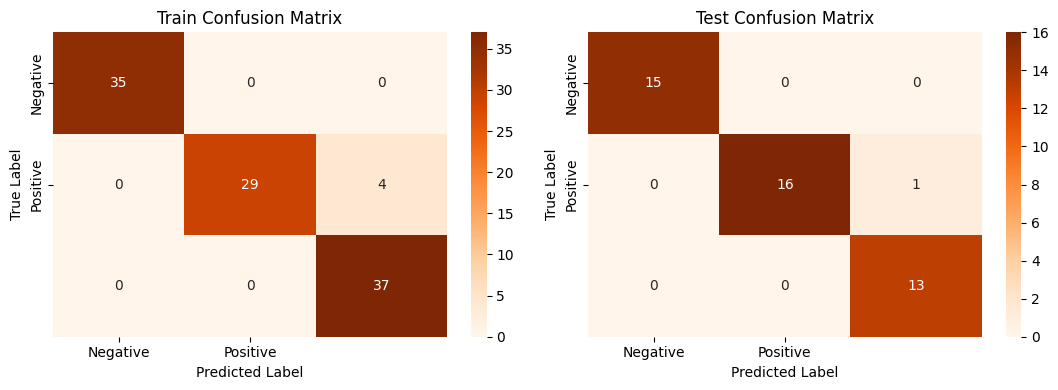


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.878788 |   0.935484 |  33        |
| 2            |    0.902439 | 1        |   0.948718 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96748  | 0.959596 |   0.961401 | 105        |
| weighted avg |    0.965621 | 0.961905 |   0.961653 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    1        | 0.941176 |   0.969697 | 17        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [88]:
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [89]:
score['Neural Network tuned']= neural2_score

In [90]:
score

,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.971632,1.000000,0.962756,1.0,0.952538,0.962756,0.971632,1.000000,1.000000,0.952692,0.952538,0.973571,0.965621
Precision Test,0.979365,0.933951,0.933951,1.0,0.979012,0.979012,1.000000,0.960234,0.960234,0.979012,1.000000,0.979365,0.979365
Recall Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000,0.952381,0.952381,0.971429,0.961905
Recall Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556,0.977778,1.000000,0.977778,0.977778
Accuracy Train,0.971429,1.000000,0.961905,1.0,0.952381,0.961905,0.971429,1.000000,1.000000,0.952381,0.952381,0.971429,0.961905
Accuracy Test,0.977778,0.933333,0.933333,1.0,0.977778,0.977778,1.000000,0.955556,0.955556,0.977778,1.000000,0.977778,0.977778
F1 macro Train,0.971399,1.000000,0.961811,1.0,0.952332,0.961811,0.971399,1.000000,1.000000,0.952410,0.952332,0.971305,0.961653
F1 macro Test,0.977853,0.932952,0.932952,1.0,0.977651,0.977651,1.000000,0.954938,0.954938,0.977651,1.000000,0.977853,0.977853


In [91]:
print(score.to_markdown())

|                 |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |                    0.971632 |        1        |              0.962756 |               1 |              0.952538 | 0.962756 |    0.971632 | 1        |    1        |      0.952692 |            0.952538 |         0.973571 |               0.965621 |
| Precision Test  |                    0.979365 |        0.933951 |              0.933951 |               1 |              0.979012 | 0.979012 |    1        | 0.960234 |    0.960234 |      0.979012 |   

In [92]:
score_t = score.transpose()
remove_models = score_t[score_t['Recall Train']>=0.98].index
remove_models
adj = score_t.drop(remove_models)
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression tuned,0.971632,0.979365,0.971429,0.977778,0.971429,0.977778,0.971399,0.977853
Decision Tree tuned,0.962756,0.933951,0.961905,0.933333,0.961905,0.933333,0.961811,0.932952
Random Forest tuned,0.952538,0.979012,0.952381,0.977778,0.952381,0.977778,0.952332,0.977651
SVM,0.962756,0.979012,0.961905,0.977778,0.961905,0.977778,0.961811,0.977651
SVM tuned,0.971632,1.000000,0.971429,1.000000,0.971429,1.000000,0.971399,1.000000
Naive Bayes,0.952692,0.979012,0.952381,0.977778,0.952381,0.977778,0.952410,0.977651
Naive Bayes tuned,0.952538,1.000000,0.952381,1.000000,0.952381,1.000000,0.952332,1.000000
Neural Network,0.973571,0.979365,0.971429,0.977778,0.971429,0.977778,0.971305,0.977853
Neural Network tuned,0.965621,0.979365,0.961905,0.977778,0.961905,0.977778,0.961653,0.977853


In [93]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [94]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: SVM tuned - 1.0
Recall: SVM tuned - 1.0
Accuracy: SVM tuned - 1.0
F1 macro: SVM tuned - 1.0


In [95]:
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| Logistic regression tuned |       0.971429 |      0.977778 |
| Decision Tree tuned       |       0.961905 |      0.933333 |
| Random Forest tuned       |       0.952381 |      0.977778 |
| SVM                       |       0.961905 |      0.977778 |
| SVM tuned                 |       0.971429 |      1        |
| Naive Bayes               |       0.952381 |      0.977778 |
| Naive Bayes tuned         |       0.952381 |      1        |
| Neural Network            |       0.971429 |      0.977778 |
| Neural Network tuned      |       0.961905 |      0.977778 |


In [96]:
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [98]:
x_rf = np.array([[3.5, 1.4, 0.2]])
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa
